In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv('/content/AAPL.csv')

In [16]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [17]:
df.shape

(2011, 7)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [19]:
df['Date']=pd.to_datetime(df['Date'],format='mixed')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2011 non-null   datetime64[ns]
 1   Open       2011 non-null   float64       
 2   High       2011 non-null   float64       
 3   Low        2011 non-null   float64       
 4   Close      2011 non-null   float64       
 5   Adj Close  2011 non-null   float64       
 6   Volume     2011 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 110.1 KB


In [21]:
df.set_index('Date',inplace=True)

In [22]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-01,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-04-01,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-05-01,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-06-01,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-09-01,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [23]:
df=df.sort_values(by='Date')

In [24]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,65.487144,65.570000,65.078575,65.169998,56.315968,67511500
2012-01-03,78.309998,78.315712,76.967140,77.781425,67.213989,170817500
2012-01-05,83.557144,85.251427,83.032860,83.161430,71.863052,152749800
2012-01-06,81.308571,81.807144,80.074287,80.141426,69.253372,130246900
2012-01-08,87.987144,88.057144,86.142860,86.687141,74.909775,96125400


Text(0, 0.5, 'Close Price')

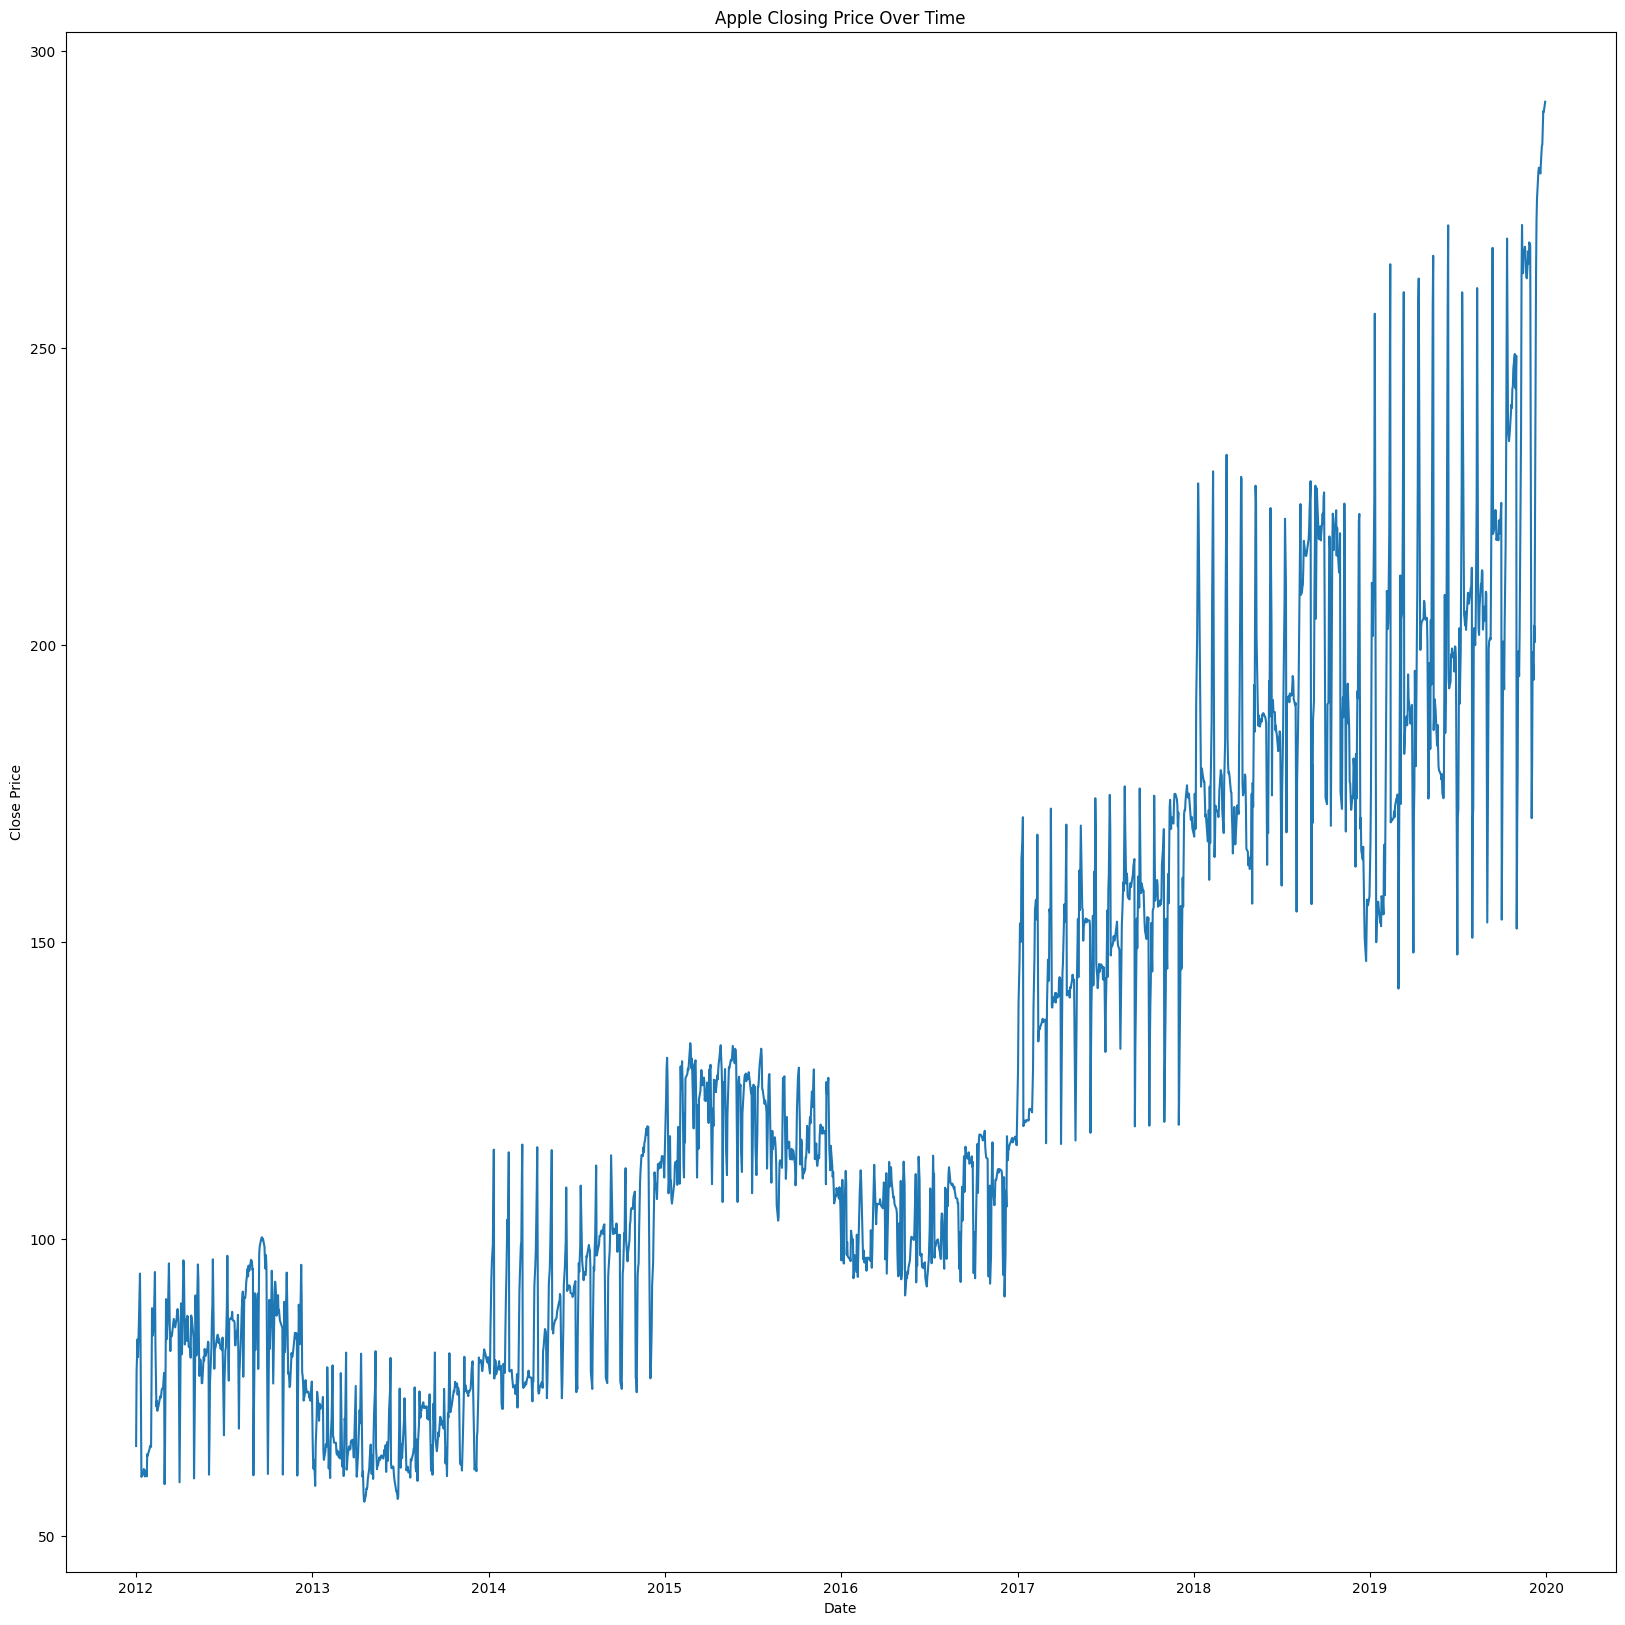

In [29]:
plt.figure(figsize=(20,20))
plt.plot(df['Close'])
plt.title("Apple Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")


In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df['Close'],model='multiplicative', period=30)

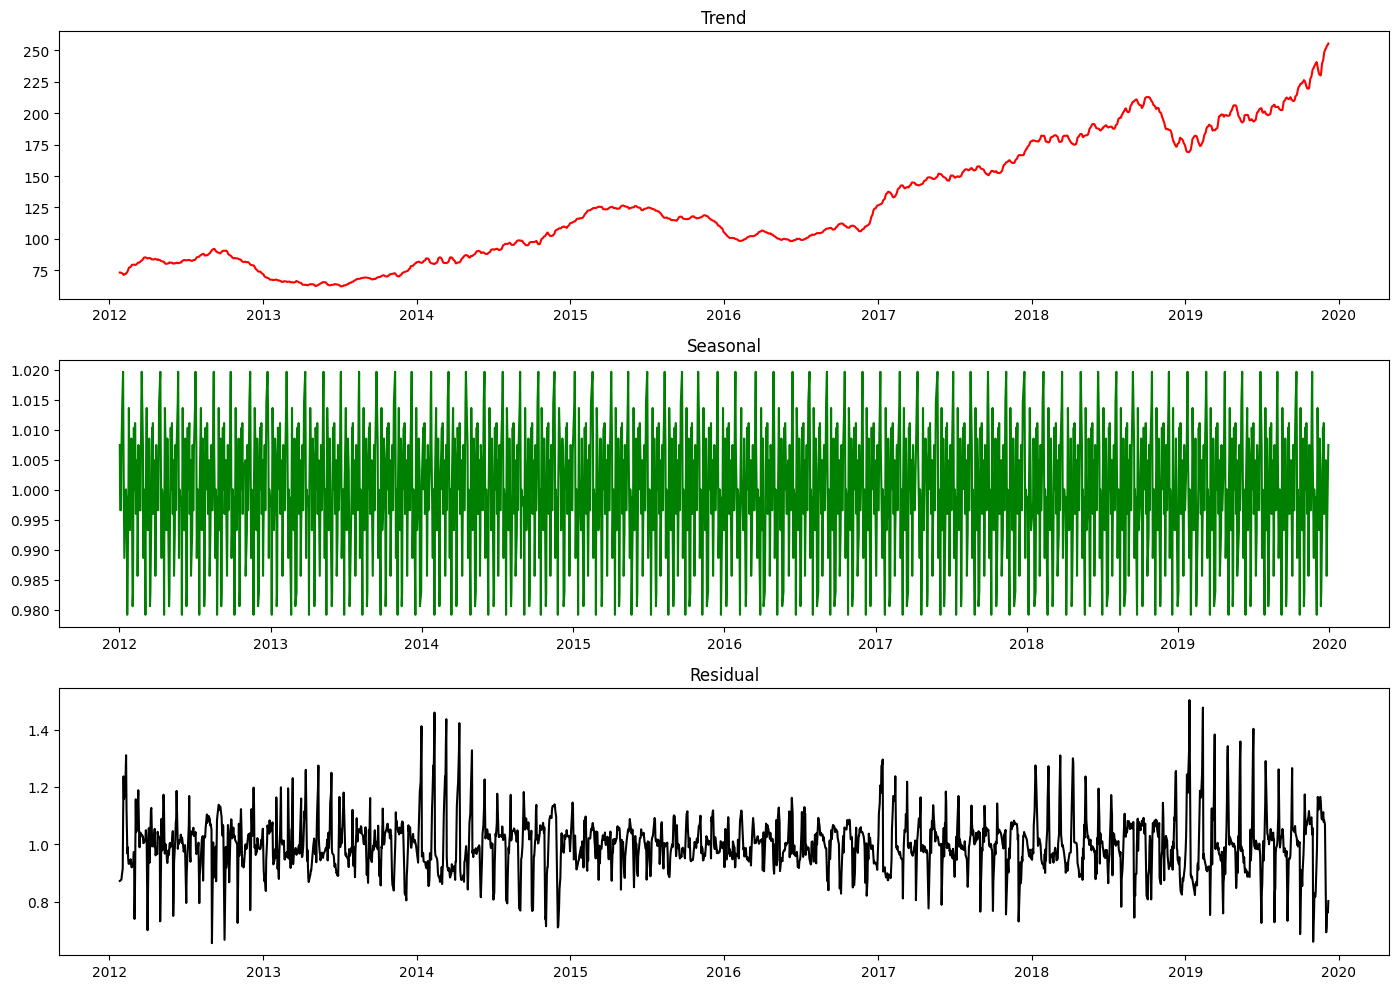

In [35]:
plt.figure(figsize=(14, 10))
plt.subplot(3,1,1)
plt.plot(result.trend,color='Red')
plt.title("Trend")

plt.subplot(3,1,2)
plt.plot(result.seasonal,color='green')
plt.title("Seasonal")

plt.subplot(3,1,3)
plt.plot(result.resid,color='black')
plt.title("Residual")

plt.tight_layout()
plt.show()



In [41]:
## Check for Stationarity:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['Close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: 1.7067047368544506
p-value: 0.9981448632645972


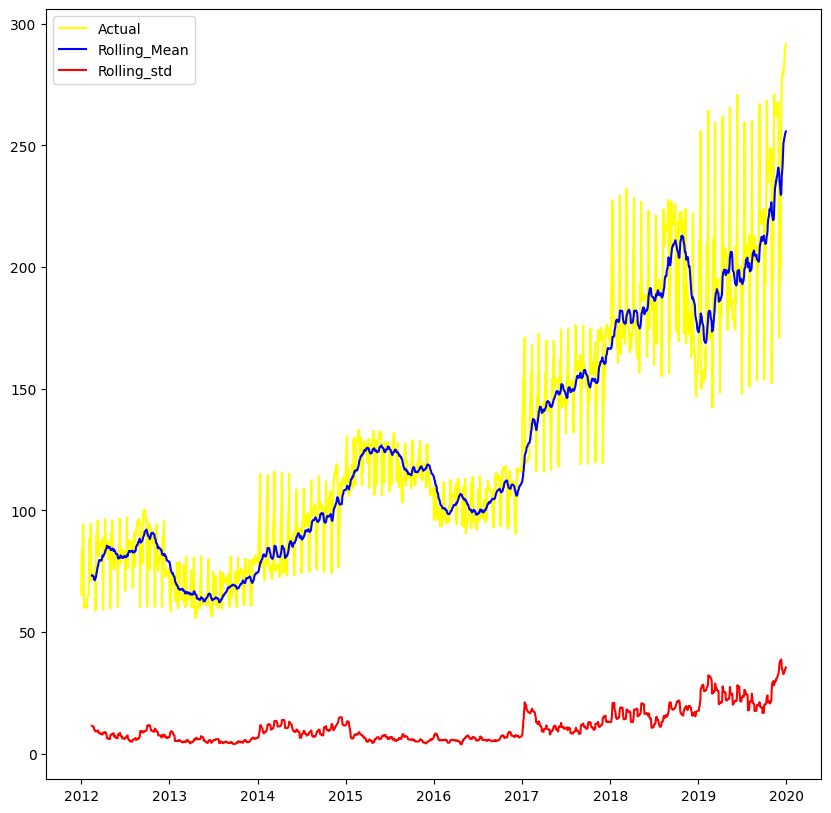

In [42]:
rolling_mean=df['Close'].rolling(window=30).mean()
rolling_std=df['Close'].rolling(window=30).std()

plt.figure(figsize=(10,10))
plt.plot(df['Close'],label="Actual",color='Yellow')
plt.plot(rolling_mean,label="Rolling_Mean",color='Blue')
plt.plot(rolling_std,label="Rolling_std",color='Red')
plt.legend()
plt.show()

In [43]:
df['Close_Diff']=df["Close"]-df['Close'].shift(1)


In [44]:
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Close_Diff
Date,,,,,,,
2012-01-03,78.309998,78.315712,76.967140,77.781425,67.213989,170817500,12.611427
2012-01-05,83.557144,85.251427,83.032860,83.161430,71.863052,152749800,5.380005
2012-01-06,81.308571,81.807144,80.074287,80.141426,69.253372,130246900,-3.020004
2012-01-08,87.987144,88.057144,86.142860,86.687141,74.909775,96125400,6.545715
2012-01-10,95.879997,96.678574,93.785713,94.198570,81.750168,135898700,7.511429


In [45]:
result=adfuller(df['Close_Diff'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -15.542828000146786
p-value: 2.1484454481760886e-28


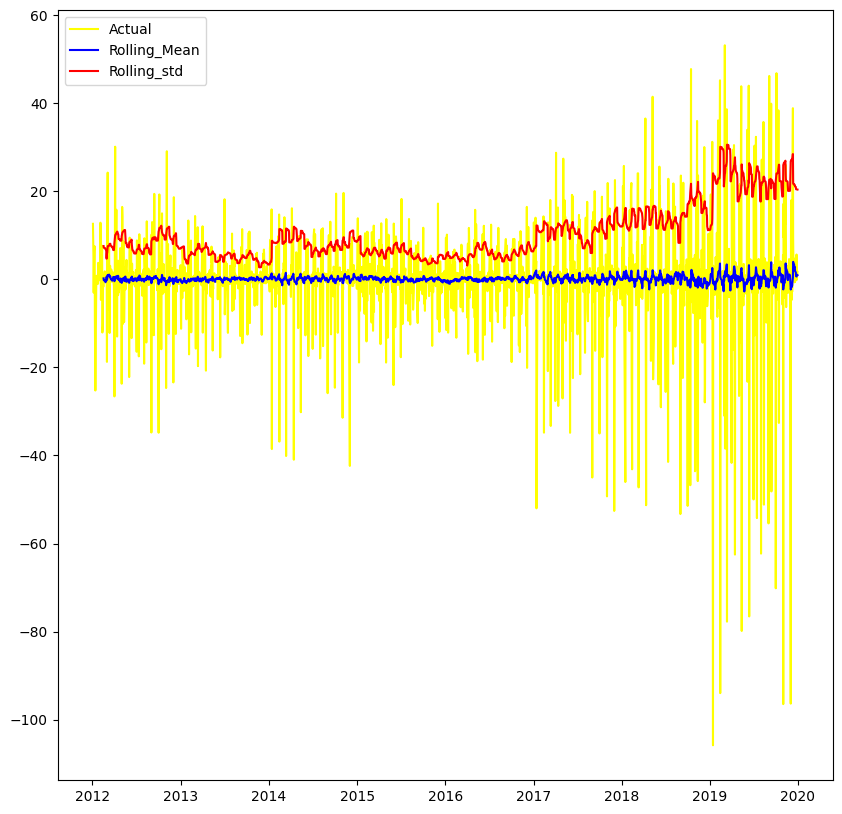

In [46]:
rolling_mean=df['Close_Diff'].rolling(window=30).mean()
rolling_std=df['Close_Diff'].rolling(window=30).std()

plt.figure(figsize=(10,10))
plt.plot(df['Close_Diff'],label="Actual",color='Yellow')
plt.plot(rolling_mean,label="Rolling_Mean",color='Blue')
plt.plot(rolling_std,label="Rolling_std",color='Red')
plt.legend()
plt.show()

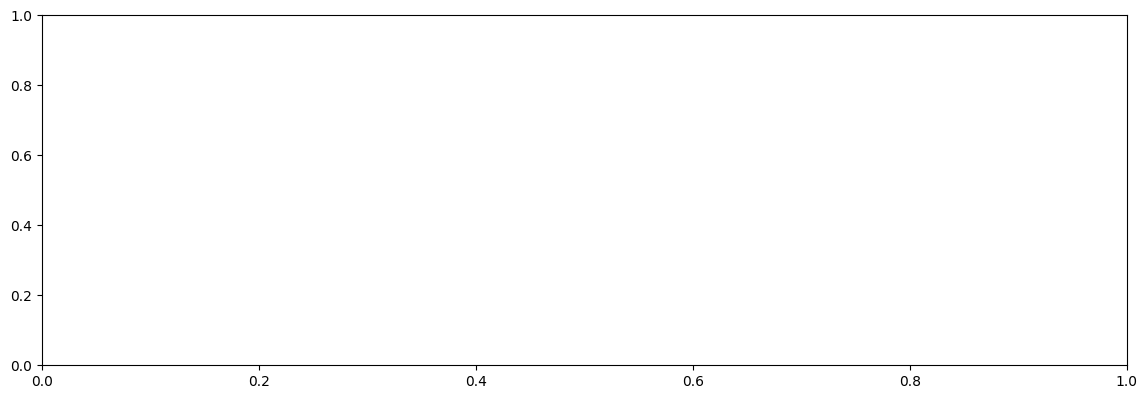

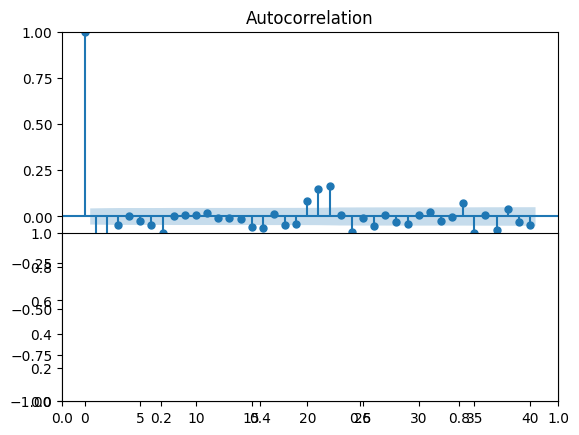

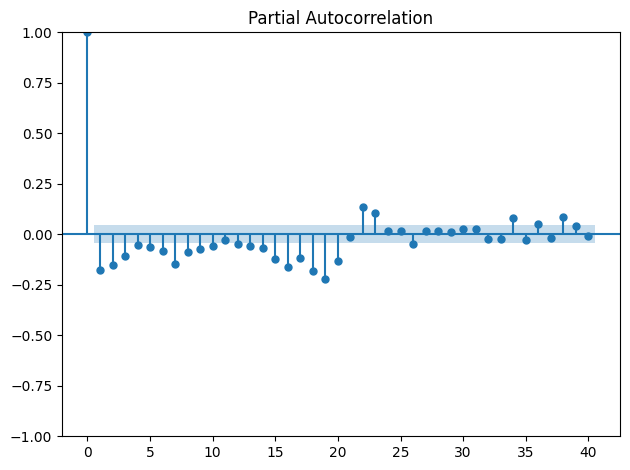

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plot_acf(df['Close_Diff'],lags=40)

plt.subplot(2,1,2)
plot_pacf(df['Close_Diff'],lags=40,method='ywm')

plt.tight_layout()
plt.show()

In [53]:
from statsmodels.tsa.arima.model import ARIMA
model_manual=ARIMA(df['Close'],order=(1,1,1))
result_manual=model_manual.fit()
print(result_manual.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2010
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7645.266
Date:                Wed, 10 Dec 2025   AIC                          15296.532
Time:                        13:29:23   BIC                          15313.348
Sample:                             0   HQIC                         15302.705
                               - 2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6377      0.012     54.021      0.000       0.615       0.661
ma.L1         -0.9483      0.008   -121.851      0.000      -0.964      -0.933
sigma2       118.2312      1.734     68.166      0.0

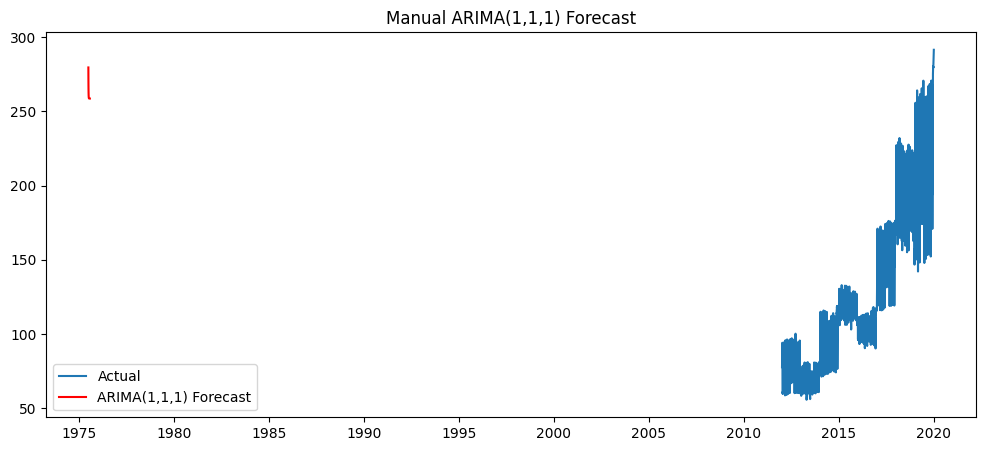

In [54]:
manual_forecast = result_manual.forecast(steps=30)

plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Actual')
plt.plot(manual_forecast.index, manual_forecast.values, label='ARIMA(1,1,1) Forecast', color='red')
plt.title("Manual ARIMA(1,1,1) Forecast")
plt.legend()
plt.show()


In [55]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 7.2 MB/s eta 0:00:00


In [56]:
from pmdarima import auto_arima
auto_model = auto_arima(df['Close'],
                        start_p=0, start_q=0,
                        max_p=10, max_q=10,
                        d=1,
                        seasonal=False,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True)

print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15594.691, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15531.278, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15502.025, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15592.856, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15290.839, Time=0.96 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15292.839, Time=1.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15292.839, Time=1.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15445.654, Time=0.72 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15486.051, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.79 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=15296.532, Time=0.68 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 11.049 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:            

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax_model = SARIMAX(df['Close'],
                        order=(1,1,1),
                        seasonal_order=(1,0,1,30))

sarimax_result = sarimax_model.fit()

print(sarimax_result.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2010
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 30)   Log Likelihood               -7645.221
Date:                            Wed, 10 Dec 2025   AIC                          15300.442
Time:                                    13:37:41   BIC                          15328.469
Sample:                                         0   HQIC                         15310.730
                                           - 2010                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6369      0.013     50.463      0.000       0.612       0.662
ma.L1         -0.9479      0.008   

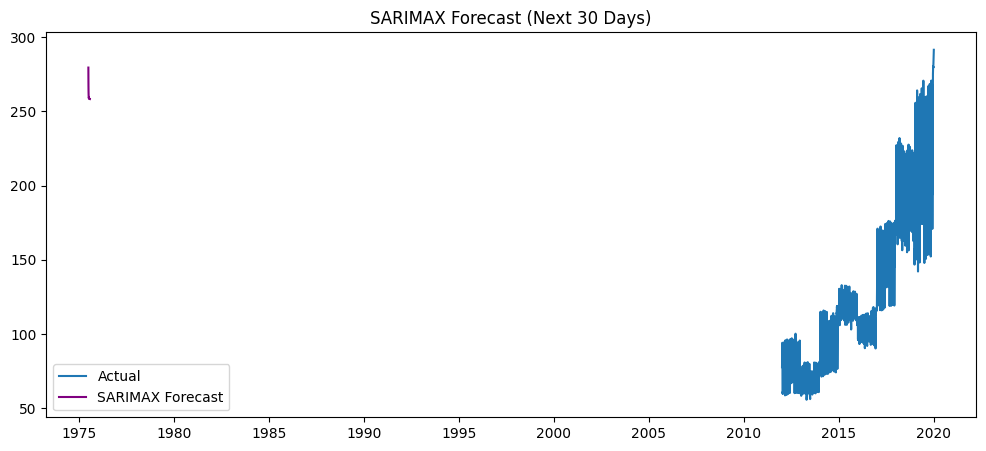

In [58]:
sarimax_forecast = sarimax_result.forecast(steps=30)

plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Actual')
plt.plot(sarimax_forecast.index, sarimax_forecast.values, label='SARIMAX Forecast', color='purple')
plt.title("SARIMAX Forecast (Next 30 Days)")
plt.legend()
plt.show()


In [62]:
##LSTM:
closed_data=df["Close"].values
closed_data = closed_data.reshape(-1, 1)
closed_data[:5]

array([[77.781425],
       [83.16143 ],
       [80.141426],
       [86.687141],
       [94.19857 ]])

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
closed_data=scaler.fit_transform(closed_data)
closed_data[:5]

array([[0.09329074],
       [0.11611348],
       [0.10330219],
       [0.13107004],
       [0.16293459]])

In [64]:
X=[]
Y=[]
window=60

for i in range(window,len(closed_data)):
    X.append(closed_data[i-window:i])
    Y.append(closed_data[i])

X=np.array(X)
Y=np.array(Y)
print("X shape:", X.shape)
print("Y shape:", Y.shape)


X shape: (1950, 60, 1)
Y shape: (1950, 1)


In [65]:
split=int(0.8*len(X))
X_train=X[:split]
X_test=X[split:]

Y_train=Y[:split]
Y_test=Y[split:]

print("Train shape:", X_train.shape, Y_train.shape)
print("Test shape:", X_test.shape, Y_test.shape)


Train shape: (1560, 60, 1) (1560, 1)
Test shape: (390, 60, 1) (390, 1)


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

In [68]:
lstm_model=Sequential()
lstm_model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(1))


In [71]:
from sklearn.metrics import mean_squared_error
lstm_model.compile(optimizer='adam',loss='mean_squared_error')

In [72]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history=lstm_model.fit(X_train,Y_train,epochs=20,batch_size=32,validation_split=0.1,callbacks=[early_stop],verbose=1)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 0.0181 - val_loss: 0.0060
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0020 - val_loss: 0.0058
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0021 - val_loss: 0.0055
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0019 - val_loss: 0.0056
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0017 - val_loss: 0.0072
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0019 - val_loss: 0.0056
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0019 - val_loss: 0.0073
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0016 - val_loss: 0.0052
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0021 - val_loss: 0.0054
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0018 - val_loss: 0.0050
Epoch 11/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0017 - val_loss: 0.0053
Epoch 12/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 0.0

In [73]:
lstm_predictions = lstm_model.predict(X_test)
predicted_prices = scaler.inverse_transform(lstm_predictions)
actual_prices = scaler.inverse_transform(Y_test.reshape(-1, 1))


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


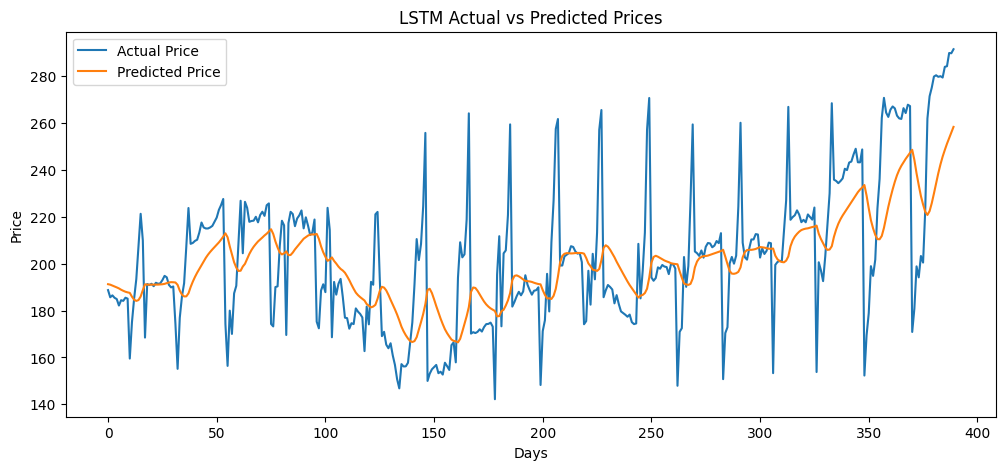

In [74]:
plt.figure(figsize=(12,5))
plt.plot(actual_prices, label="Actual Price")
plt.plot(predicted_prices, label="Predicted Price")
plt.title("LSTM Actual vs Predicted Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


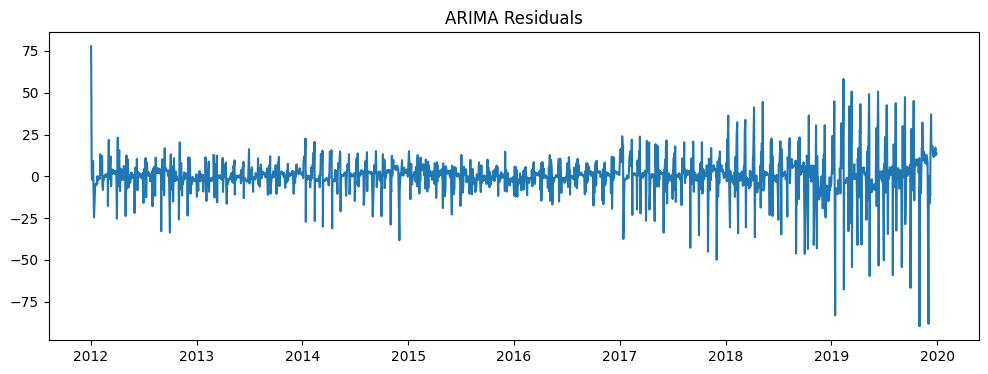

In [76]:
##Hybrid Model:
arima_pred = result_manual.fittedvalues
residuals = df['Close'] - arima_pred
residuals = residuals.dropna()

plt.figure(figsize=(12,4))
plt.plot(residuals)
plt.title("ARIMA Residuals")
plt.show()

In [77]:
residuals_values = residuals.values.reshape(-1,1)
residuals_scaled = scaler.fit_transform(residuals_values)
X_res = []
y_res = []
window = 60

for i in range(window, len(residuals_scaled)):
    X_res.append(residuals_scaled[i-window:i])
    y_res.append(residuals_scaled[i])

X_res = np.array(X_res)
y_res = np.array(y_res)

split_res = int(0.8 * len(X_res))
X_res_train = X_res[:split_res]
y_res_train = y_res[:split_res]
X_res_test = X_res[split_res:]
y_res_test = y_res[split_res:]

print("Residual Train Shape:", X_res_train.shape)
print("Residual Test Shape:", X_res_test.shape)

Residual Train Shape: (1560, 60, 1)
Residual Test Shape: (390, 60, 1)


In [78]:
res_lstm = Sequential()
res_lstm.add(LSTM(50, return_sequences=True, input_shape=(60,1)))
res_lstm.add(Dropout(0.2))
res_lstm.add(LSTM(50, return_sequences=False))
res_lstm.add(Dropout(0.2))
res_lstm.add(Dense(1))

res_lstm.compile(optimizer='adam', loss='mean_squared_error')

res_lstm.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
history_res = res_lstm.fit(
    X_res_train, y_res_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1)


Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - loss: 0.0881 - val_loss: 0.0075
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0045 - val_loss: 0.0068
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0040 - val_loss: 0.0065
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0040 - val_loss: 0.0064
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0040 - val_loss: 0.0063
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0038 - val_loss: 0.0079
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0038 - val_loss: 0.0063
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0038 - val_loss: 0.0063
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0036 - val_loss: 0.0064
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0036 - val_loss: 0.0063
Epoch 11/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0032 - val_loss: 0.0064
Epoch 12/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0

In [80]:
residual_predictions_scaled = res_lstm.predict(X_res_test)
residual_predictions = scaler.inverse_transform(residual_predictions_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [81]:
arima_fitted = result_manual.fittedvalues
arima_test_pred = arima_fitted[-len(residual_predictions):].values.reshape(-1,1)


In [84]:
hybrid_forecast = arima_test_pred + residual_predictions
actual_prices_hybrid = df['Close'].values[-len(hybrid_forecast):].reshape(-1,1)

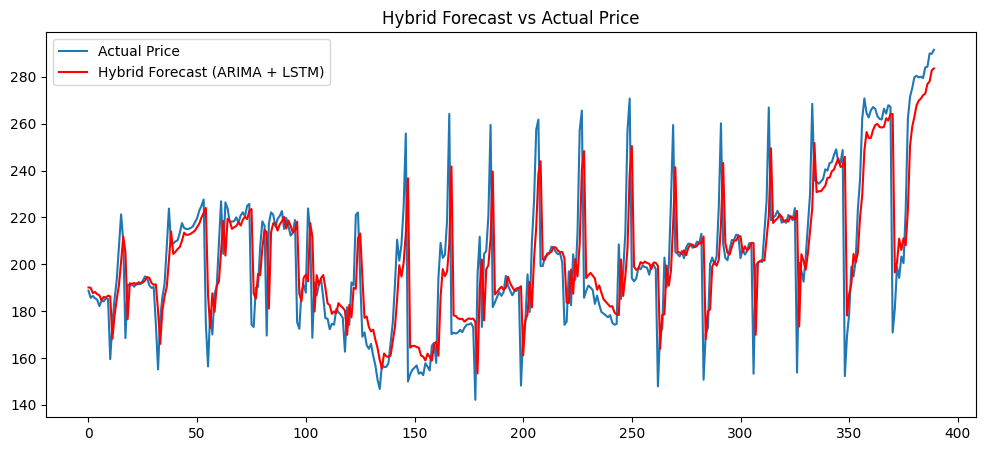

In [85]:
plt.figure(figsize=(12,5))
plt.plot(actual_prices_hybrid, label='Actual Price')
plt.plot(hybrid_forecast, label='Hybrid Forecast (ARIMA + LSTM)', color='red')
plt.title("Hybrid Forecast vs Actual Price")
plt.legend()
plt.show()
